In [1]:
# # -*- coding: utf-8 -*-
# """
# Created on Thu Aug 15 11:21:22 2019
# @author: suchismitasa
# """

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from sklearn.metrics import r2_score
from tqdm import trange

In [84]:
# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])

trainset = tv.datasets.MNIST(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=2048, shuffle=False)

testset = tv.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=2048, shuffle=False)

In [25]:
# Data Preprocessing
bs = 1024

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])

trainset = tv.datasets.EMNIST(root='./data',  split='letters', train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True)

testset = tv.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False)

In [26]:
# # Data Preprocessing

# transform = transforms.Compose([transforms.ToTensor()])#, transforms.Normalize((0.1307,), (0.3081,))])
# trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor()])#, tv.transforms.Normalize((0.1307,), (0.3081,))])

# trainset = tv.datasets.(root='./data',  train=True,download=True, transform=transform)
# dataloader = torch.utils.data.DataLoader(trainset, batch_size=2048, shuffle=False)

# testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=2048, shuffle=False)

In [27]:
# Defining Model
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))

        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,1,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [28]:
# Defining Parameters

num_epochs = 20
batch_size = 2048
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

for epoch in trange(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

  5%|▌         | 1/20 [02:06<40:07, 126.73s/it]

epoch [1/20], loss:1.0090


 10%|█         | 2/20 [04:15<38:27, 128.19s/it]

epoch [2/20], loss:0.9989


 15%|█▌        | 3/20 [06:41<38:37, 136.30s/it]

epoch [3/20], loss:1.0012


 20%|██        | 4/20 [08:54<35:59, 135.00s/it]

epoch [4/20], loss:1.0016


 25%|██▌       | 5/20 [10:59<32:49, 131.28s/it]

epoch [5/20], loss:0.9997


 30%|███       | 6/20 [13:08<30:25, 130.37s/it]

epoch [6/20], loss:1.0047


 30%|███       | 6/20 [14:34<33:59, 145.69s/it]


KeyboardInterrupt: 

In [6]:
torch.save({
            'epoch': num_epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, './models/EMNIST.pt')

In [18]:
for data in dataloader:
    img, _ = data
    img = Variable(img).cpu()
    # ===================forward=====================
    output = model(img)
    break

In [19]:
for data in testloader:
    img, _ = data
    img = Variable(img).cpu()
    # ===================forward=====================
    # output = model(img)
    break

In [20]:
import matplotlib.pyplot as plt

In [21]:
plotimgout = output.detach().cpu().numpy()

In [22]:
import numpy as np

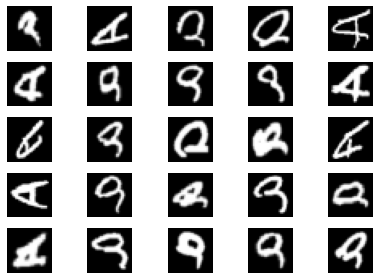

In [23]:
random_samples = np.random.randint(
    1, len(testloader), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(img[idx][0].numpy(), cmap='gray')
    
    # plt.title(img[idx][1])
    plt.axis('off')
    

plt.tight_layout()
plt.show()

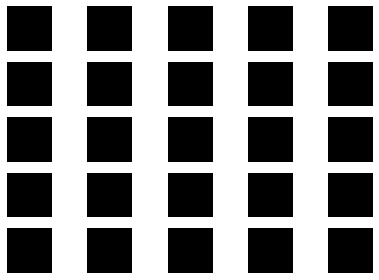

In [24]:
# random_samples = np.random.randint(
#     1, len(testloader), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(output[idx][0].detach().cpu().numpy(), cmap='gray')
    # plt.title(img[idx][1])
    plt.axis('off')

plt.tight_layout()
plt.show()

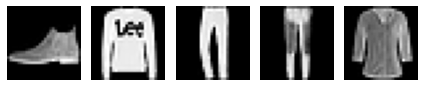

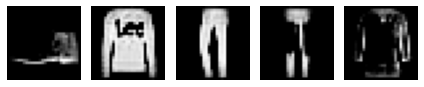

In [132]:

for idx in range(5):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img[idx][0].numpy(), cmap='gray')
    # plt.title(img[idx][1])
    plt.axis('off')
    

plt.tight_layout()
plt.show()


for idx in range(5):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(output[idx][0].detach().cpu().numpy(), cmap='gray')
    # plt.title(img[idx][1])
    plt.axis('off')
    

plt.tight_layout()
plt.show()

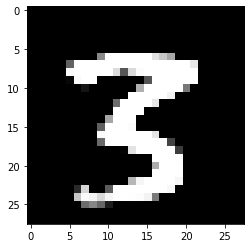

In [91]:

idx = 991
plt.imshow(plotimgout[idx][0],cmap='gray')

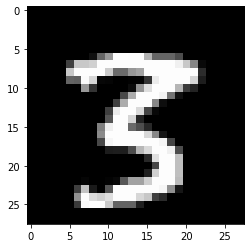

In [92]:
plotimgin = img.detach().cpu().numpy()
plt.imshow(plotimgin[idx][0],cmap='gray')

In [66]:
pred = plotimgout[idx][0].flatten()
act = plotimgin[idx][0].flatten()
r2_score(act, pred)

0.3280884679822693

In [67]:
for data in dataloader:
    img, _ = data
    img = Variable(img).cpu()
    # ===================forward=====================
    output = model(img)
    break

In [69]:
batch_size = len(testloader)

rs = []
for batch in tqdm(testloader):
    
    # Loading image(s) and
    # reshaping it into a 1-d vector
    img, _ = batch
    img = Variable(img).cpu()

    # Generating output
    output = model(img)
    for i in range(28*28):
        pred = output.detach().cpu().numpy()[:,i]
        act = img.detach().cpu().numpy()[:,i]
        rs.append(r2_score(act,pred.round(2)))
#     break

NameError: name 'tqdm' is not defined

In [70]:
output.detach().cpu().numpy().shape

(2048, 1, 28, 28)

In [78]:
oo = output.detach().cpu().numpy()
oo = oo.reshape(2048,784)

In [79]:
ii = img.detach().cpu().numpy()
ii = ii.reshape(2048,784)

In [80]:
ii.shape, oo.shape

((2048, 784), (2048, 784))

In [81]:
rs = []
for i in range(784):
    act = ii[:,i]
    pre = oo[:,i]
    rs.append(r2_score(act,pre))

In [82]:
rspos = [r for r in rs if r > 0]

In [83]:
torch.mean(torch.tensor(rspos)), len(rspos)

(tensor(0.2535, dtype=torch.float64), 467)